In [1]:
import numpy as np
import scipy.ndimage
from PIL import Image
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
import pytesseract
import random

In [2]:
def display_image(img):
    plt.imshow(img, cmap='gray')
    plt.show()

### 1. Apply morphological operator to binary image drawings.

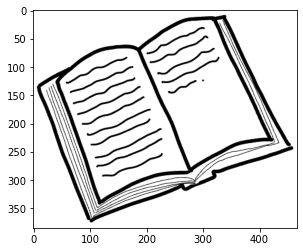

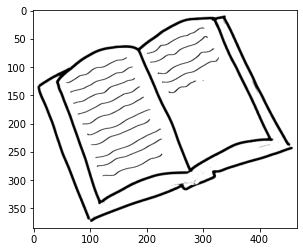

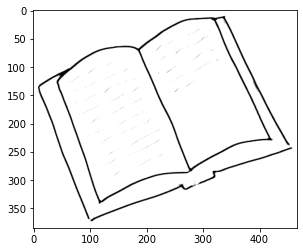

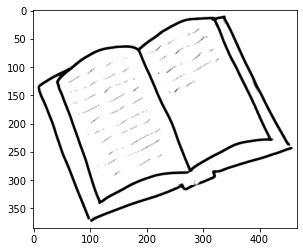

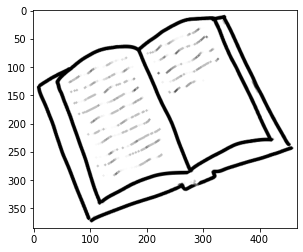

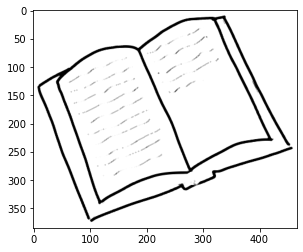

In [3]:
kernel = np.array([[0,1,0],
                   [1,1,1],
                   [0,1,0]], np.uint8)

original = cv2.imread('drawing.jpeg', 0)
display_image(original)

img_a = cv2.dilate(original, kernel, iterations=1)
display_image(img_a)
img_a = cv2.dilate(img_a, kernel, iterations=1)
display_image(img_a)
img_a = cv2.erode(img_a, kernel, iterations=1)
display_image(img_a)
img_a = cv2.erode(img_a, kernel, iterations=1)
display_image(img_a)
img_a = cv2.dilate(img_a, kernel, iterations=1)
display_image(img_a)

### 2. Apply morphological operators to handwritten text as preprocessing for OCR

IN\ y Weme cd Kibo le! Lyss- ae. |
OA ww e eo ‘

7 Ce WP en Seccmnren she Ment aX
% Berc\lun. Ns y Pav kews ks CA © Pn a dawye
SON Art tre, earn A neve le aAA A te wves een
mM y dS
| ce anime a

be we |e an Qow Xo Ke 2 rng, Wee

aar &S be \pcca We & en Ae ni Ne @
me ine Ny, low A \ eww bend

Yeewsh,

\ Ase 0 y Wen & cy cw) owners X BAS



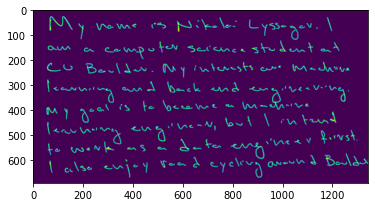

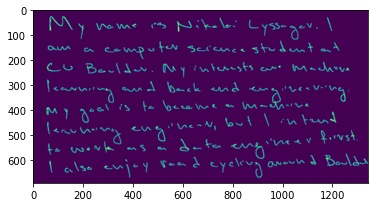

Ny wewe os pashele:

Nd
7 ® ch, ’ 4
OW Bw Ce we eo FN sew can ee SY 4 cant nr

C_. Oo B Be Ne \ A aad NN Pot AA Veons 5 es came IRA ax ves

\ Ce Camda NA GE Seats Ba A ve AA cs ae Pp nes vowe ,
0 ; é
f < \y eee WA (pa om BA ATE Ne &
ae \ ’ ‘ ah fp 4
ern e i mer, Oo \ \ “ .
= C\

Q




In [4]:
def display_image(img):
    plt.imshow(img)
    plt.show()

# Run OCR on original
img1 = np.array(Image.open('handwriting.jpeg').convert('1'))
text = pytesseract.image_to_string(img1)
print(text)

# Load into CV2 and apply morphological operators
original = cv2.imread('handwriting.jpeg', 0)
display_image(original)

new_img = cv2.erode(original, kernel, iterations=1)
# display_image(new_img)
new_img = cv2.dilate(new_img, kernel, iterations=1)
# display_image(img_a)
new_img = cv2.dilate(new_img, kernel, iterations=1)
# display_image(img_a)
imnew_imgg_a = cv2.erode(new_img, kernel, iterations=1)
# display_image(img_a)
new_img = cv2.erode(new_img, kernel, iterations=1)
# new_img = cv2.erode(new_img, kernel, iterations=1)
display_image(new_img)

# Save the image and run OCR again
cv2.imwrite('new_handwriting.jpeg', new_img)
new_img = np.array(Image.open('new_handwriting.jpeg').convert('1'))
text = pytesseract.image_to_string(new_img)
print(text)

### 4. Use `scipy.ndimage.convolve` to test the effects of different padding modes on a movie poster image of your choice.

Original


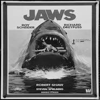

convolution, mode=reflect


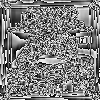

convolution, mode=nearest


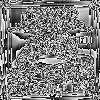

cross-correlation, mode=nearest


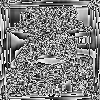

In [5]:
H = np.array([[0,1,1,0,0,1,1] for _ in range(7)])

with Image.open('movie_poster.jpeg') as img:
    # Resize and convert to gregscale
    print("Original")
    original = img.resize((100,100)).convert('L')
    display(original)
    
    # Convolve with mode=reflect
    reflected = scipy.ndimage.convolve(original, H, mode='reflect')
    reflected = Image.fromarray(reflected, 'L')
    print("convolution, mode=reflect")
    display(reflected)
    
    # Convolve with mode=nearest
    nearest = scipy.ndimage.convolve(original, H, mode='nearest')
    nearest = Image.fromarray(nearest, 'L')
    print("convolution, mode=nearest")
    display(nearest)
    
    # Cross-correlate with mode=nearest
    nearest_cc = scipy.ndimage.correlate(original, H, mode='nearest')
    nearest_cc = Image.fromarray(nearest_cc, 'L')
    print("cross-correlation, mode=nearest")
    display(nearest_cc)

### 7. Implement custom padding functions

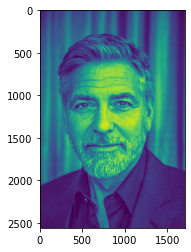

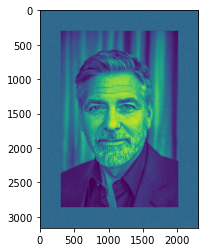

In [7]:
def random_pad(img, pad_size):
    """
    Adds pad_size pixels of padding to img by using random
    pixel values in the image. Assumes img is a grayscale
    numpy array.
    """
    # New dim is old_dim + pad_size * 2
    height, width = img.shape
    img_flat = list(img.flatten())
    
    # Add width padding first
    padded = [random.sample(img_flat, pad_size) + list(row) + random.sample(img_flat, pad_size) 
                for row in img]
    
    # Now add the height padding
    for _ in range(pad_size):
        first_row = random.sample(img_flat, width+pad_size*2)
        last_row = random.sample(img_flat, width+pad_size*2)
        padded.insert(0, first_row)
        padded.append(last_row)
        
    return np.array(padded)
    


me = cv2.imread("me.jpg", cv2.IMREAD_GRAYSCALE)
display_image(me)
display_image(random_pad(me, 300))

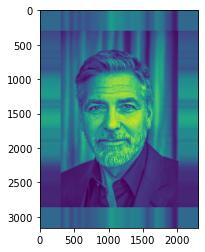

In [8]:
def average_pad(img, pad_size):
    """
    Computes average padding as described in the assignment
    for a given numpy array.
    """
    height, width = img.shape
    
    # Array of average of columns and rows
    col_avg = img.mean(0).flatten()
    row_avg = img.mean(1).flatten()
    
    # Add S-block on sides
    side_S = np.array([[ra]*pad_size for ra in row_avg])
    padded = np.concatenate([side_S, img], axis=1)
    padded = np.concatenate([padded, side_S], axis=1)
    
    # Form C-blocks
    top_S_avg = col_avg.mean()
    C = np.zeros((pad_size, pad_size))
    C.fill(top_S_avg)
    
    # Top and bottom S-blocks
    top_S = np.array([col_avg for _ in range(pad_size)])
    top_and_bottom = np.concatenate([C, top_S], axis=1)
    top_and_bottom = np.concatenate([top_and_bottom, C], axis=1)
    
    # Put on the hat and the boots
    padded = np.concatenate([top_and_bottom, padded])
    padded = np.concatenate([padded, top_and_bottom])
    
    return padded
    
    
display_image(average_pad(me, 300))